In [1]:
#Importing Libraries

#For Manipulations
import numpy as np
import pandas as pd

#For Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

In [2]:
#Reading the Dataset
train=pd.read_csv('train.csv')
train.head(10)

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.00,NaN,479.00,NaN,622.00,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435
1,20329,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.00,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921
2,17679,current,M,44,264,10800.49,3215.52,21659.64,1607.0,1168.00,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970
3,16428,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.50,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579
4,18721,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.00,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814
5,4340,current,M,26,233,53819.88,1371.00,4712.92,2220.0,1048.00,...,22.0,20603.0,31189.26,33183.13,7.0,31.0,20890.0,NaN,0.00,626
6,28060,current,F,30,683,1495.00,4237.00,2212.00,5292.0,1964.00,...,24.0,24782.0,27984.33,81517.00,3.0,31.0,50000.0,NaN,0.00,2052
7,746,current,M,32,892,1847.00,5976.00,1347.80,4112.0,669.00,...,19.0,30281.0,39320.36,34332.00,3.0,23.0,31663.0,NaN,0.00,434
8,41628,current,M,37,233,9214.92,NaN,95625.88,16423.0,11419.76,...,28.0,51555.0,285663.35,254939.15,25.0,34.0,92800.0,NaN,0.00,10331
9,16836,saving,M,47,233,9191.31,NaN,8327.55,NaN,14642.00,...,NaN,NaN,NaN,503.00,1.0,0.0,275.0,NaN,0.00,2437


In [3]:
test = pd.read_csv('test.csv')

In [4]:
#Lets check shape of the dataset
print('The Shape of the train_dataset: ',train.shape)
print('The Shape of the test_dataset: ',test.shape)

The Shape of the train_dataset:  (32820, 44)
The Shape of the test_dataset:  (14067, 43)


In [5]:
# % of missing value present in the train_dataset
train.isnull().mean()*100

id                        0.000000
account_type              0.000000
gender                    0.000000
age                       0.000000
region_code               0.000000
cc_cons_apr               0.000000
dc_cons_apr              58.049970
cc_cons_may               0.000000
dc_cons_may              52.830591
cc_cons_jun               0.000000
dc_cons_jun              64.890311
cc_count_apr              7.309567
cc_count_may              3.513102
cc_count_jun              4.844607
dc_count_apr             58.049970
dc_count_may             52.830591
dc_count_jun             47.218160
card_lim                  0.027422
personal_loan_active     91.645338
vehicle_loan_active      97.422303
personal_loan_closed     91.215722
vehicle_loan_closed      95.048751
investment_1             95.655088
investment_2             92.876295
investment_3             95.941499
investment_4             98.762949
debit_amount_apr          5.758684
credit_amount_apr        10.060938
debit_count_apr     

In [6]:
# % of missing value present in the train_dataset
test.isnull().mean()*100

id                        0.000000
account_type              0.000000
gender                    0.000000
age                       0.000000
region_code               0.000000
cc_cons_apr               0.000000
dc_cons_apr              58.505723
cc_cons_may               0.000000
dc_cons_may              52.427668
cc_cons_jun               0.000000
dc_cons_jun              64.434492
cc_count_apr              7.378972
cc_count_may              3.852989
cc_count_jun              4.507002
dc_count_apr             58.505723
dc_count_may             52.427668
dc_count_jun             46.577095
card_lim                  0.021327
personal_loan_active     91.938580
vehicle_loan_active      97.476363
personal_loan_closed     91.049975
vehicle_loan_closed      95.158882
investment_1             95.379256
investment_2             92.699225
investment_3             95.635175
investment_4             98.770171
debit_amount_apr          6.021184
credit_amount_apr        10.414445
debit_count_apr     

In [7]:
train.drop(['id'],axis=1,inplace=True)
test_id = test['id']
test.drop(['id'], axis=1, inplace=True)

In [8]:
#Lets check shape of the dataset
print('The Shape of the train_dataset: ',train.shape)
print('The Shape of the test_dataset: ',test.shape)

The Shape of the train_dataset:  (32820, 43)
The Shape of the test_dataset:  (14067, 42)


In [9]:
#Lets check the head of the dataset
train.head()


,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,saving,M,63,305,7695.00,NaN,479.00,NaN,622.0,NaN,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435
1,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.0,2806.24,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921
2,current,M,44,264,10800.49,3215.52,21659.64,1607.0,1168.0,355.00,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970
3,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.5,NaN,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579
4,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.0,NaN,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32820 entries, 0 to 32819
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   account_type           32820 non-null  object 
 1   gender                 32820 non-null  object 
 2   age                    32820 non-null  int64  
 3   region_code            32820 non-null  int64  
 4   cc_cons_apr            32820 non-null  float64
 5   dc_cons_apr            13768 non-null  float64
 6   cc_cons_may            32820 non-null  float64
 7   dc_cons_may            15481 non-null  float64
 8   cc_cons_jun            32820 non-null  float64
 9   dc_cons_jun            11523 non-null  float64
 10  cc_count_apr           30421 non-null  float64
 11  cc_count_may           31667 non-null  float64
 12  cc_count_jun           31230 non-null  float64
 13  dc_count_apr           13768 non-null  float64
 14  dc_count_may           15481 non-null  float64
 15  dc

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14067 entries, 0 to 14066
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   account_type           14067 non-null  object 
 1   gender                 14067 non-null  object 
 2   age                    14067 non-null  int64  
 3   region_code            14067 non-null  int64  
 4   cc_cons_apr            14067 non-null  float64
 5   dc_cons_apr            5837 non-null   float64
 6   cc_cons_may            14067 non-null  float64
 7   dc_cons_may            6692 non-null   float64
 8   cc_cons_jun            14067 non-null  float64
 9   dc_cons_jun            5003 non-null   float64
 10  cc_count_apr           13029 non-null  float64
 11  cc_count_may           13525 non-null  float64
 12  cc_count_jun           13433 non-null  float64
 13  dc_count_apr           5837 non-null   float64
 14  dc_count_may           6692 non-null   float64
 15  dc

In [12]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,32820.0,35.951676,8.529949e+00,22.00,31.0000,34.0000,39.0000,224.00
region_code,32820.0,554.854327,1.882203e+02,123.00,425.0000,575.0000,683.0000,977.00
cc_cons_apr,32820.0,16661.907189,2.513844e+04,233.97,3712.0000,8912.7900,19932.0600,804712.58
dc_cons_apr,13768.0,5727.615837,1.154406e+04,10.01,849.0000,2282.1600,6074.6000,366223.16
cc_cons_may,32820.0,14411.904558,2.363688e+04,103.00,2983.2975,7332.2975,16847.8500,1117246.31
dc_cons_may,15481.0,5635.506904,1.405234e+04,20.00,796.0000,2129.0000,5640.0000,911223.49
cc_cons_jun,32820.0,9031.179889,1.572085e+04,51.00,1637.8750,4147.4875,10126.2500,382914.10
dc_cons_jun,11523.0,4666.713420,1.026519e+04,23.00,743.0000,1832.0000,4607.5000,301991.94
cc_count_apr,30421.0,9.162191,1.079071e+01,1.00,3.0000,7.0000,12.0000,1012.00
cc_count_may,31667.0,9.540184,9.648387e+00,1.00,3.0000,7.0000,13.0000,601.00


In [13]:
train.describe(include=object)

,account_type,gender,loan_enq
count,32820,32820,609
unique,2,2,1
top,current,M,Y
freq,25825,28106,609


In [14]:
test.describe(include=object)

,account_type,gender,loan_enq
count,14067,14067,246
unique,2,2,1
top,current,M,Y
freq,11102,12044,246


In [15]:
# Select columns with data type 'object' from the 'train' DataFrame and store them in 'df_cat'.
df_cat = train.select_dtypes(include=[object])

# Select columns with data types 'int64' or 'float64' from the 'train' DataFrame and store them in 'df_num'.
df_num = train.select_dtypes(include=['int64', 'float64'])

# Replace negative values in 'df_num' with 0.
df_num[df_num < 0] = 0
df_num

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,63,305,7695.00,NaN,479.00,NaN,622.00,NaN,2.0,1.0,...,3.0,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,0.00,435
1,33,326,52702.00,988.72,29873.00,NaN,1087.00,2806.24,11.0,14.0,...,6.0,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,4963.33,1921
2,44,264,10800.49,3215.52,21659.64,1607.0,1168.00,355.00,6.0,9.0,...,2.0,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,0.00,1970
3,44,233,20936.00,NaN,2094.00,NaN,11778.50,NaN,9.0,6.0,...,1.0,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,1238.18,21579
4,35,324,1183.83,NaN,3656.29,NaN,945.00,NaN,2.0,7.0,...,2.0,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,0.00,1814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32815,43,583,45275.20,NaN,48901.62,NaN,47267.41,NaN,19.0,10.0,...,2.0,5.0,46500.0,45065.00,57403.00,4.0,9.0,48000.0,11192.56,3691
32816,33,623,1627.00,NaN,3494.54,1393.0,3242.00,1304.00,2.0,2.0,...,3.0,9.0,136503.0,124930.00,17209.93,3.0,20.0,16403.0,3702.50,4275
32817,25,245,22409.00,2538.00,41241.00,639.0,2087.00,1215.00,NaN,56.0,...,1.0,2.0,16923.0,34993.98,25289.98,6.0,20.0,16870.0,0.00,1677
32818,33,535,9877.30,373.00,9018.22,NaN,2804.00,NaN,17.0,15.0,...,3.0,4.0,6500.0,44352.21,44302.36,9.0,6.0,19087.0,1716.37,846


In [16]:
# Concatenate the DataFrames 'df_num' and 'df_cat' along the columns (axis=1) to create a new DataFrame 'df'.
train = pd.concat([df_num, df_cat], axis=1)
train

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type,gender,loan_enq
0,63,305,7695.00,NaN,479.00,NaN,622.00,NaN,2.0,1.0,...,20215.85,1279.37,7.0,3.0,470.0,0.00,435,saving,M,NaN
1,33,326,52702.00,988.72,29873.00,NaN,1087.00,2806.24,11.0,14.0,...,122037.66,55390.00,8.0,19.0,27000.0,4963.33,1921,current,M,NaN
2,44,264,10800.49,3215.52,21659.64,1607.0,1168.00,355.00,6.0,9.0,...,46827.00,29297.91,6.0,19.0,20800.0,0.00,1970,current,M,NaN
3,44,233,20936.00,NaN,2094.00,NaN,11778.50,NaN,9.0,6.0,...,5426.55,7544.00,3.0,1.0,5300.0,1238.18,21579,saving,M,NaN
4,35,324,1183.83,NaN,3656.29,NaN,945.00,NaN,2.0,7.0,...,26178.05,53483.00,4.0,4.0,45000.0,0.00,1814,saving,F,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32815,43,583,45275.20,NaN,48901.62,NaN,47267.41,NaN,19.0,10.0,...,45065.00,57403.00,4.0,9.0,48000.0,11192.56,3691,saving,M,NaN
32816,33,623,1627.00,NaN,3494.54,1393.0,3242.00,1304.00,2.0,2.0,...,124930.00,17209.93,3.0,20.0,16403.0,3702.50,4275,current,M,NaN
32817,25,245,22409.00,2538.00,41241.00,639.0,2087.00,1215.00,NaN,56.0,...,34993.98,25289.98,6.0,20.0,16870.0,0.00,1677,current,M,NaN
32818,33,535,9877.30,373.00,9018.22,NaN,2804.00,NaN,17.0,15.0,...,44352.21,44302.36,9.0,6.0,19087.0,1716.37,846,current,M,NaN


# Exploratory Data Analysis (EDA)

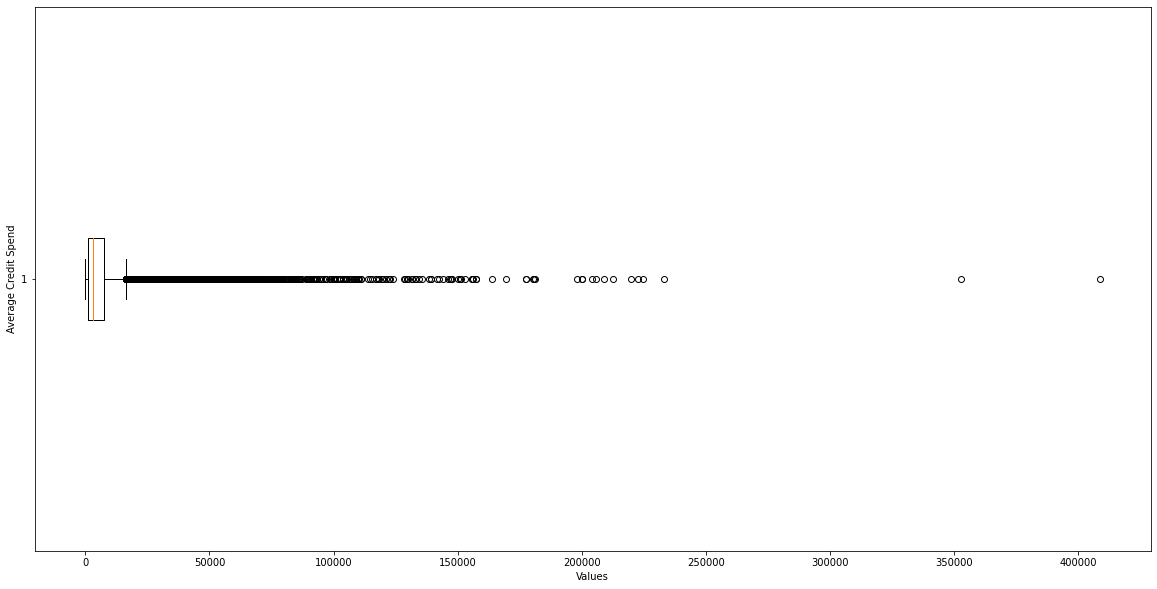

In [17]:
#Outliers
#boxplot
plt.figure(figsize = (20,10))
plt.boxplot(train['cc_cons'], vert = False)
plt.ylabel('Average Credit Spend')
plt.xlabel('Values')
plt.show()

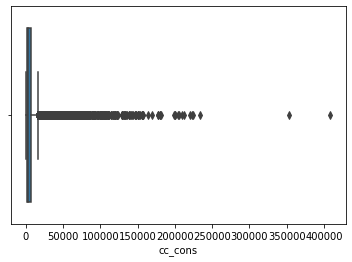

In [18]:
# Create a box plot for Average Credit Card Spend in next three months.
sns.boxplot(x=train['cc_cons'])
plt.show()

In [19]:
train.loc[train['cc_cons'] >= 100000 ].shape

(96, 43)

There are only 96 rows with value more than 100000

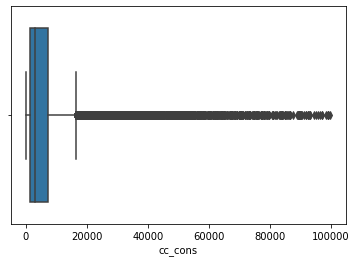

In [20]:
train.drop(train[train['cc_cons'] >= 100000].index, inplace = True)
sns.boxplot(x=train['cc_cons'])
plt.show()

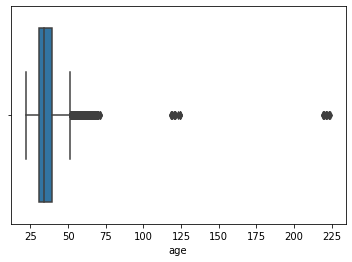

In [21]:
# Create a box plot for age
sns.boxplot(x=train['age'])
plt.show()

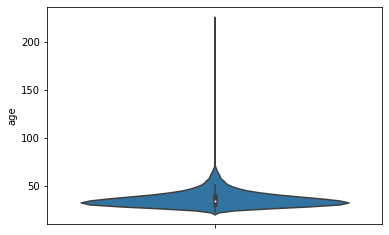

In [22]:
# Create a violin plot for checking outliers
sns.violinplot(y=train['age'])
plt.show()

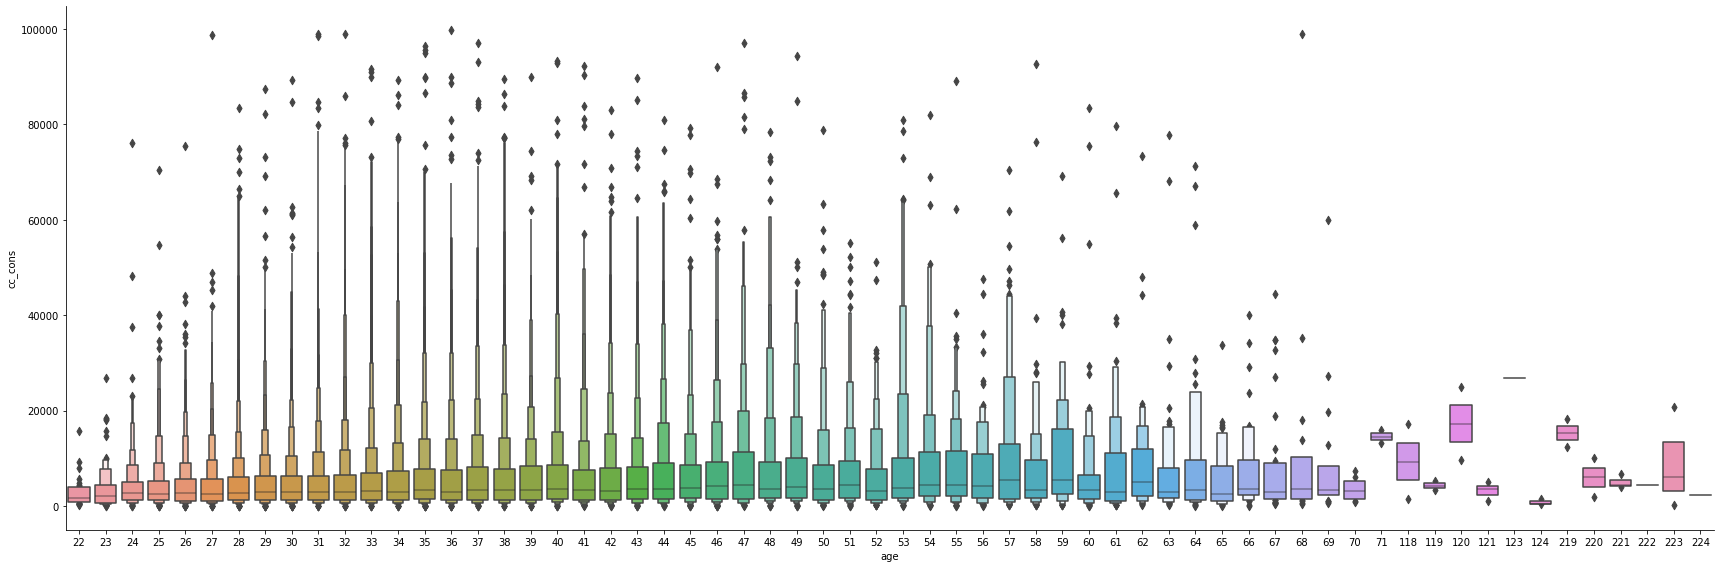

In [23]:
# Age of customer  vs  Average Credit Card Spend

sns.catplot(y = "cc_cons", x = "age", data = train.sort_values("cc_cons", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

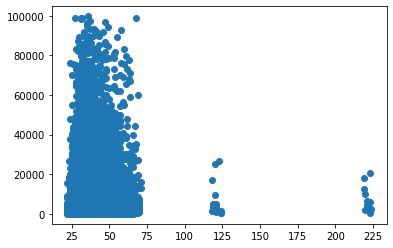

In [24]:
plt.scatter(train['age'], train['cc_cons'])
plt.show()

In [25]:
train.loc[train['age'] >= 100 ].shape

(25, 43)

There are only 25 rows with age more than 100 and also it is unreal so drop these outliers

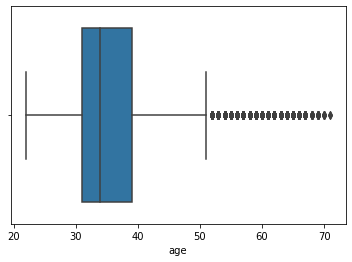

In [26]:
train.drop(train[train['age'] >= 100].index, inplace = True)
sns.boxplot(x=train['age'])
plt.show()

In [27]:
pd.crosstab(train['gender'],train['account_type'],margins=True)

account_type,current,saving,All
gender,,,
F,3842,853,4695
M,21908,6096,28004
All,25750,6949,32699


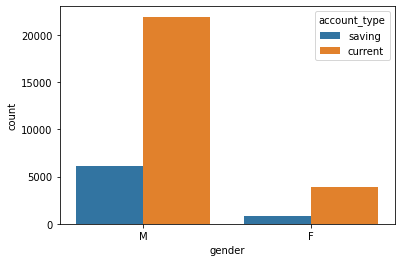

In [28]:
sns.countplot(x="gender", data=train, hue="account_type");

In [29]:
train[['gender','cc_cons']].groupby(['gender'],as_index=False).mean()

,gender,cc_cons
0,F,7278.182109
1,M,6282.486181


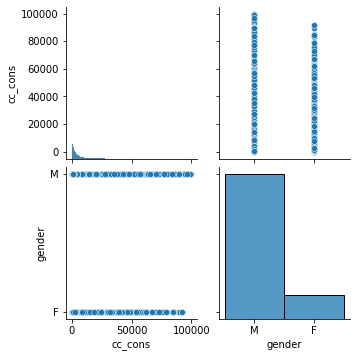

In [30]:
sns.pairplot(data=train,vars=["cc_cons","gender"])

In [31]:
pd.crosstab(train['gender'],train['account_type'],values=train['cc_cons'],aggfunc=np.mean,margins=True)

account_type,current,saving,All
gender,,,
F,6982.894326,8608.188746,7278.182109
M,5891.672722,7687.004101,6282.486181
All,6054.487223,7800.080875,6425.450564


<AxesSubplot:xlabel='gender', ylabel='cc_cons'>

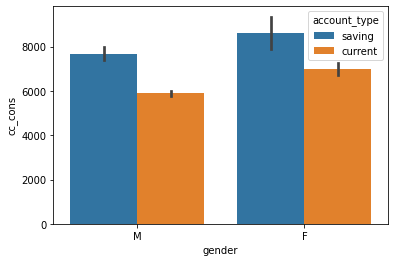

In [32]:
sns.barplot(x="gender" , y="cc_cons", hue="account_type", data=train)

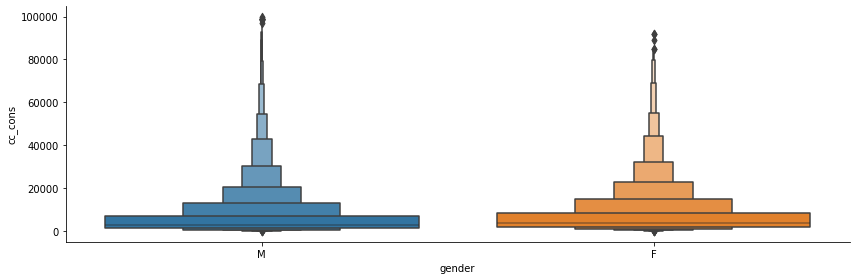

In [33]:
# Gender vs  Average Credit Card Spend

sns.catplot(y = "cc_cons", x = "gender", data = train.sort_values("cc_cons", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

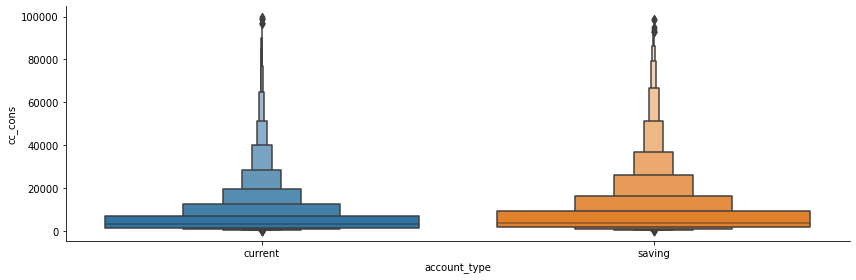

In [34]:
# Account Type  vs  Average Credit Card Spend

sns.catplot(y = "cc_cons", x = "account_type", data = train.sort_values("cc_cons", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

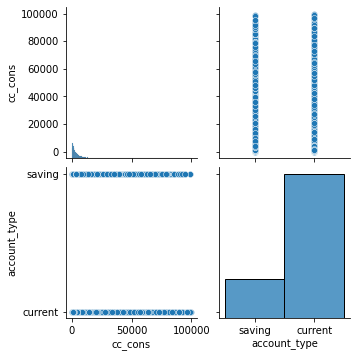

In [35]:
sns.pairplot(data=train,vars=["cc_cons","account_type"])

In [36]:
pd.crosstab(train['gender'],train['account_type'],values=train['cc_cons'],aggfunc=np.mean,margins=True)

account_type,current,saving,All
gender,,,
F,6982.894326,8608.188746,7278.182109
M,5891.672722,7687.004101,6282.486181
All,6054.487223,7800.080875,6425.450564


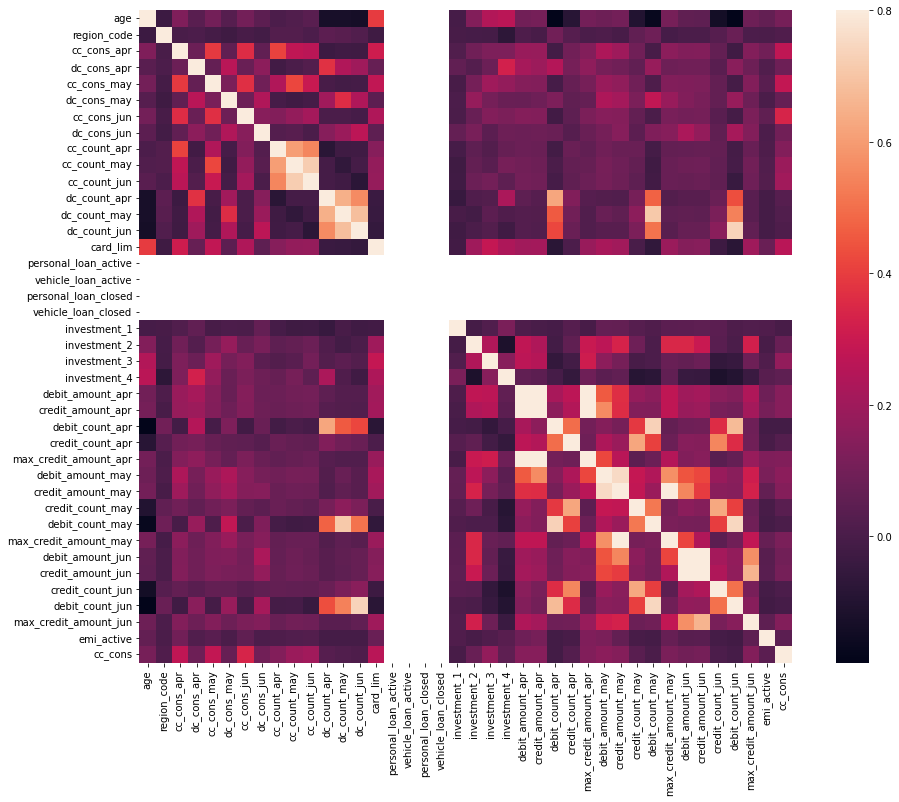

In [37]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

# Handling Missing Values

<AxesSubplot:>

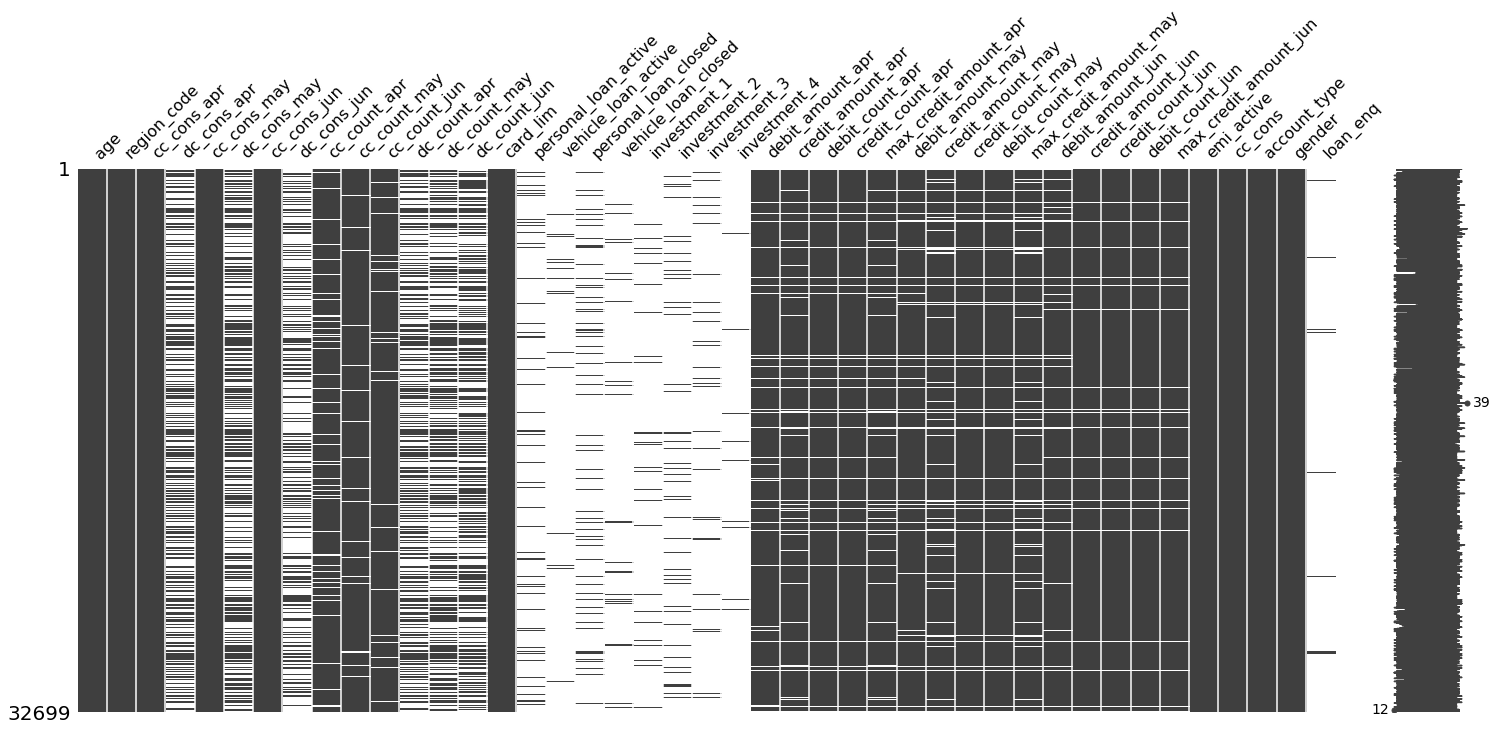

In [38]:
# Visualize missing data using missingno
msno.matrix(train)

In [39]:
#Lets check if there is any missing value present in the dataset
train.isnull().sum()

age                          0
region_code                  0
cc_cons_apr                  0
dc_cons_apr              18966
cc_cons_may                  0
dc_cons_may              17258
cc_cons_jun                  0
dc_cons_jun              21209
cc_count_apr              2388
cc_count_may              1148
cc_count_jun              1589
dc_count_apr             18966
dc_count_may             17258
dc_count_jun             15423
card_lim                     9
personal_loan_active     29974
vehicle_loan_active      31856
personal_loan_closed     29837
vehicle_loan_closed      31086
investment_1             31286
investment_2             30376
investment_3             31377
investment_4             32295
debit_amount_apr          1881
credit_amount_apr         3284
debit_count_apr           1749
credit_count_apr          1749
max_credit_amount_apr     3284
debit_amount_may          2285
credit_amount_may         3387
credit_count_may          2057
debit_count_may           2057
max_cred

In [40]:
# % of missing value present in the dataset
train.isnull().mean()*100

age                       0.000000
region_code               0.000000
cc_cons_apr               0.000000
dc_cons_apr              58.001774
cc_cons_may               0.000000
dc_cons_may              52.778372
cc_cons_jun               0.000000
dc_cons_jun              64.861311
cc_count_apr              7.302976
cc_count_may              3.510811
cc_count_jun              4.859476
dc_count_apr             58.001774
dc_count_may             52.778372
dc_count_jun             47.166580
card_lim                  0.027524
personal_loan_active     91.666412
vehicle_loan_active      97.421940
personal_loan_closed     91.247439
vehicle_loan_closed      95.067127
investment_1             95.678767
investment_2             92.895807
investment_3             95.957063
investment_4             98.764488
debit_amount_apr          5.752469
credit_amount_apr        10.043121
debit_count_apr           5.348787
credit_count_apr          5.348787
max_credit_amount_apr    10.043121
debit_amount_may    

# Feature Engineering

In [41]:
train.columns

Index(['age', 'region_code', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may',
       'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr',
       'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may',
       'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'emi_active', 'cc_cons', 'account_type', 'gender', 'loan_enq'],
      dtype='object')

In [42]:
# Summing up columns and creating new features
train["investment"] = train[['investment_1', 'investment_2', 'investment_3', 'investment_4']].sum(axis=1)
train["total_active_loan"] = train[['personal_loan_active', 'vehicle_loan_active']].sum(axis=1)
train["total_closed_loan"] = train[['personal_loan_closed', 'vehicle_loan_closed']].sum(axis=1)

In [43]:
# Taking the mean of columns and creating new features
train['cc_cons_old'] = train[['cc_cons_apr', 'cc_cons_may', 'cc_cons_jun']].mean(axis=1)
train['dc_cons'] = train[['dc_cons_apr', 'dc_cons_may', 'dc_cons_jun']].mean(axis=1)
train['cc_count'] = train[['cc_count_apr', 'cc_count_may', 'cc_count_jun']].mean(axis=1)
train['dc_count'] = train[['dc_count_apr', 'dc_count_may', 'dc_count_jun']].mean(axis=1)
train['debit_amount'] = train[['debit_amount_apr', 'debit_amount_may', 'debit_amount_jun']].mean(axis=1)
train['credit_amount'] = train[['credit_amount_apr', 'credit_amount_may', 'credit_amount_jun']].mean(axis=1)
train['max_credit_amount'] = train[['max_credit_amount_apr', 'max_credit_amount_may', 'max_credit_amount_jun']].mean(axis=1)
train['debit_count'] = train[['debit_count_apr', 'debit_count_may', 'debit_count_jun']].mean(axis=1)
train['credit_count'] = train[['credit_count_apr', 'credit_count_may', 'credit_count_jun']].mean(axis=1)

In [44]:
# summing up the columns in test data
test["investment"]= test[['investment_1','investment_2','investment_3','investment_4']].sum(axis=1)
test["total_active_loan"]= test[['personal_loan_active','vehicle_loan_active']].sum(axis=1)
test["total_closed_loan"]= test[['personal_loan_closed','vehicle_loan_closed']].sum(axis=1)

In [45]:
# taking mean of the columns
test['cc_cons_old'] = test[['cc_cons_apr', 'cc_cons_may','cc_cons_jun']].mean(axis=1)
test['dc_cons'] = test[['dc_cons_apr', 'dc_cons_may','dc_cons_jun']].mean(axis=1)
test['cc_count'] = test[['cc_count_apr', 'cc_count_may','cc_count_jun']].mean(axis=1)
test['dc_count'] = test[['dc_count_apr', 'dc_count_may','dc_count_jun']].mean(axis=1)
test['debit_amount'] = test[['debit_amount_apr', 'debit_amount_may','debit_amount_jun']].mean(axis=1)
test['credit_amount'] = test[['credit_amount_apr', 'credit_amount_may','credit_amount_jun']].mean(axis=1)
test['max_credit_amount'] = test[['max_credit_amount_apr', 'max_credit_amount_may','max_credit_amount_jun']].mean(axis=1)
test['debit_count'] = test[['debit_count_apr', 'debit_count_may','debit_count_jun']].mean(axis=1)
test['credit_count'] = test[['credit_count_apr', 'credit_count_may','credit_count_jun']].mean(axis=1)

In [46]:
# Define the list of columns to delete
cols_to_delete = ['investment_1', 'investment_2','investment_3','investment_4','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed', 'cc_cons_apr', 'cc_cons_may', 'cc_cons_jun', 'dc_cons_apr', 'dc_cons_may', 'dc_cons_jun', 'cc_count_apr','cc_count_may','cc_count_jun','dc_count_apr', 'dc_count_may', 'dc_count_jun',
                    'debit_amount_apr', 'debit_amount_may', 'debit_amount_jun', 'credit_amount_apr', 'credit_amount_may', 'credit_amount_jun', 'max_credit_amount_apr','max_credit_amount_may',
                    'max_credit_amount_jun', 'debit_count_apr', 'debit_count_may', 'debit_count_jun', 'credit_count_apr', 'credit_count_may', 'credit_count_jun' ]



In [47]:
# Drop the specified columns from the DataFrame
train = train.drop(columns = cols_to_delete)
test = test.drop(columns = cols_to_delete)

In [48]:
#Lets check shape of the dataset
print('The Shape of the train_dataset: ',train.shape)
print('The Shape of the test_dataset: ',test.shape)

The Shape of the train_dataset:  (32699, 20)
The Shape of the test_dataset:  (14067, 19)


In [49]:
train.head()

,age,region_code,card_lim,emi_active,cc_cons,account_type,gender,loan_enq,investment,total_active_loan,total_closed_loan,cc_cons_old,dc_cons,cc_count,dc_count,debit_amount,credit_amount,max_credit_amount,debit_count,credit_count
0,63,305,150000.0,0.00,435,saving,M,NaN,168845.2,0.0,0.0,2932.000000,NaN,2.0,NaN,32053.846667,55263.456667,31823.333333,2.666667,3.666667
1,33,326,176000.0,4963.33,1921,current,M,NaN,0.0,0.0,1.0,27887.333333,1897.48,12.0,3.500000,128063.756667,133269.333333,82333.333333,16.333333,7.666667
2,44,264,65000.0,0.00,1970,current,M,NaN,0.0,0.0,0.0,11209.376667,1725.84,7.0,6.333333,37864.850000,30430.303333,15433.333333,14.000000,4.000000
3,44,233,600000.0,1238.18,21579,saving,M,NaN,132442.0,0.0,0.0,11602.833333,NaN,7.0,NaN,8922.953333,9789.000000,8866.666667,1.333333,1.666667
4,35,324,100000.0,0.00,1814,saving,F,NaN,0.0,0.0,0.0,1928.373333,NaN,6.0,NaN,13367.016667,22316.000000,19333.333333,4.333333,2.333333


In [50]:
test.head()

,account_type,gender,age,region_code,card_lim,loan_enq,emi_active,investment,total_active_loan,total_closed_loan,cc_cons_old,dc_cons,cc_count,dc_count,debit_amount,credit_amount,max_credit_amount,debit_count,credit_count
0,saving,M,36,447,75000.0,NaN,0.00,0.0,0.0,1.0,8049.900000,1170.0,4.666667,1.000000,16551.236667,15283.173333,11666.666667,7.333333,2.333333
1,current,M,31,233,116000.0,NaN,0.00,0.0,0.0,0.0,34978.856667,NaN,22.666667,NaN,NaN,NaN,NaN,NaN,NaN
2,current,M,26,823,40000.0,NaN,2885.82,0.0,0.0,0.0,3984.763333,1158.0,3.333333,4.666667,69166.233333,69600.666667,31759.333333,23.333333,4.000000
3,current,M,39,878,86000.0,NaN,0.00,0.0,0.0,0.0,12382.900000,NaN,14.333333,NaN,60989.516667,70819.333333,39544.666667,7.666667,5.333333
4,current,M,44,404,250000.0,NaN,3342.58,0.0,0.0,0.0,23048.493333,NaN,33.333333,NaN,32321.346667,34849.666667,29666.666667,4.333333,1.666667


In [51]:
# % of missing value present in the new_train_dataset
train.isnull().mean()*100

age                   0.000000
region_code           0.000000
card_lim              0.027524
emi_active            0.000000
cc_cons               0.000000
account_type          0.000000
gender                0.000000
loan_enq             98.143674
investment            0.000000
total_active_loan     0.000000
total_closed_loan     0.000000
cc_cons_old           0.000000
dc_cons              40.307043
cc_count              0.000000
dc_count             35.285483
debit_amount          4.449677
credit_amount         4.385455
max_credit_amount     4.385455
debit_count           4.067403
credit_count          4.067403
dtype: float64

In [52]:
# % of missing value present in the  new_test_dataset
test.isnull().mean()*100

account_type          0.000000
gender                0.000000
age                   0.000000
region_code           0.000000
card_lim              0.021327
loan_enq             98.251226
emi_active            0.000000
investment            0.000000
total_active_loan     0.000000
total_closed_loan     0.000000
cc_cons_old           0.000000
dc_cons              40.044075
cc_count              0.000000
dc_count             34.961257
debit_amount          4.464349
credit_amount         4.350608
max_credit_amount     4.350608
debit_count           4.052037
credit_count          4.052037
dtype: float64

Loan Enquiry has stil got 98% NaN values in both test and train dataset.
 

we will replace Y with 1 and NaN with zero

In [53]:
# Handling missing values in the 'loan_enq' column
# For the train dataset
train['loan_enq'].fillna(0, inplace=True)
train['loan_enq'].replace(to_replace=dict(Y=1, NaN=0), inplace=True)

# For the test dataset
test['loan_enq'].fillna(0, inplace=True)
test['loan_enq'].replace(to_replace=dict(Y=1, NaN=0), inplace=True)

In [54]:
# Identify columns with missing values and store their names in 'na_cols'
na_cols = list(train.columns[train.isnull().any()].values)

# Display the list of columns with missing values
na_cols

['card_lim',
 'dc_cons',
 'dc_count',
 'debit_amount',
 'credit_amount',
 'max_credit_amount',
 'debit_count',
 'credit_count']

In [55]:
# Fill missing values in 'train' with zeros
train.fillna(0, inplace = True)

# For the test dataset, Fill missing values in 'test' with zeros
test.fillna(0, inplace = True)

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32699 entries, 0 to 32819
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                32699 non-null  int64  
 1   region_code        32699 non-null  int64  
 2   card_lim           32699 non-null  float64
 3   emi_active         32699 non-null  float64
 4   cc_cons            32699 non-null  int64  
 5   account_type       32699 non-null  object 
 6   gender             32699 non-null  object 
 7   loan_enq           32699 non-null  int64  
 8   investment         32699 non-null  float64
 9   total_active_loan  32699 non-null  float64
 10  total_closed_loan  32699 non-null  float64
 11  cc_cons_old        32699 non-null  float64
 12  dc_cons            32699 non-null  float64
 13  cc_count           32699 non-null  float64
 14  dc_count           32699 non-null  float64
 15  debit_amount       32699 non-null  float64
 16  credit_amount      326

In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14067 entries, 0 to 14066
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   account_type       14067 non-null  object 
 1   gender             14067 non-null  object 
 2   age                14067 non-null  int64  
 3   region_code        14067 non-null  int64  
 4   card_lim           14067 non-null  float64
 5   loan_enq           14067 non-null  int64  
 6   emi_active         14067 non-null  float64
 7   investment         14067 non-null  float64
 8   total_active_loan  14067 non-null  float64
 9   total_closed_loan  14067 non-null  float64
 10  cc_cons_old        14067 non-null  float64
 11  dc_cons            14067 non-null  float64
 12  cc_count           14067 non-null  float64
 13  dc_count           14067 non-null  float64
 14  debit_amount       14067 non-null  float64
 15  credit_amount      14067 non-null  float64
 16  max_credit_amount  140

# Calculate the null values after filling with zeros

In [58]:
# % of missing value present in the train_dataset
train.isnull().mean()*100

age                  0.0
region_code          0.0
card_lim             0.0
emi_active           0.0
cc_cons              0.0
account_type         0.0
gender               0.0
loan_enq             0.0
investment           0.0
total_active_loan    0.0
total_closed_loan    0.0
cc_cons_old          0.0
dc_cons              0.0
cc_count             0.0
dc_count             0.0
debit_amount         0.0
credit_amount        0.0
max_credit_amount    0.0
debit_count          0.0
credit_count         0.0
dtype: float64

In [59]:
# % of missing value present in the test_dataset
test.isnull().mean()*100

account_type         0.0
gender               0.0
age                  0.0
region_code          0.0
card_lim             0.0
loan_enq             0.0
emi_active           0.0
investment           0.0
total_active_loan    0.0
total_closed_loan    0.0
cc_cons_old          0.0
dc_cons              0.0
cc_count             0.0
dc_count             0.0
debit_amount         0.0
credit_amount        0.0
max_credit_amount    0.0
debit_count          0.0
credit_count         0.0
dtype: float64

<AxesSubplot:>

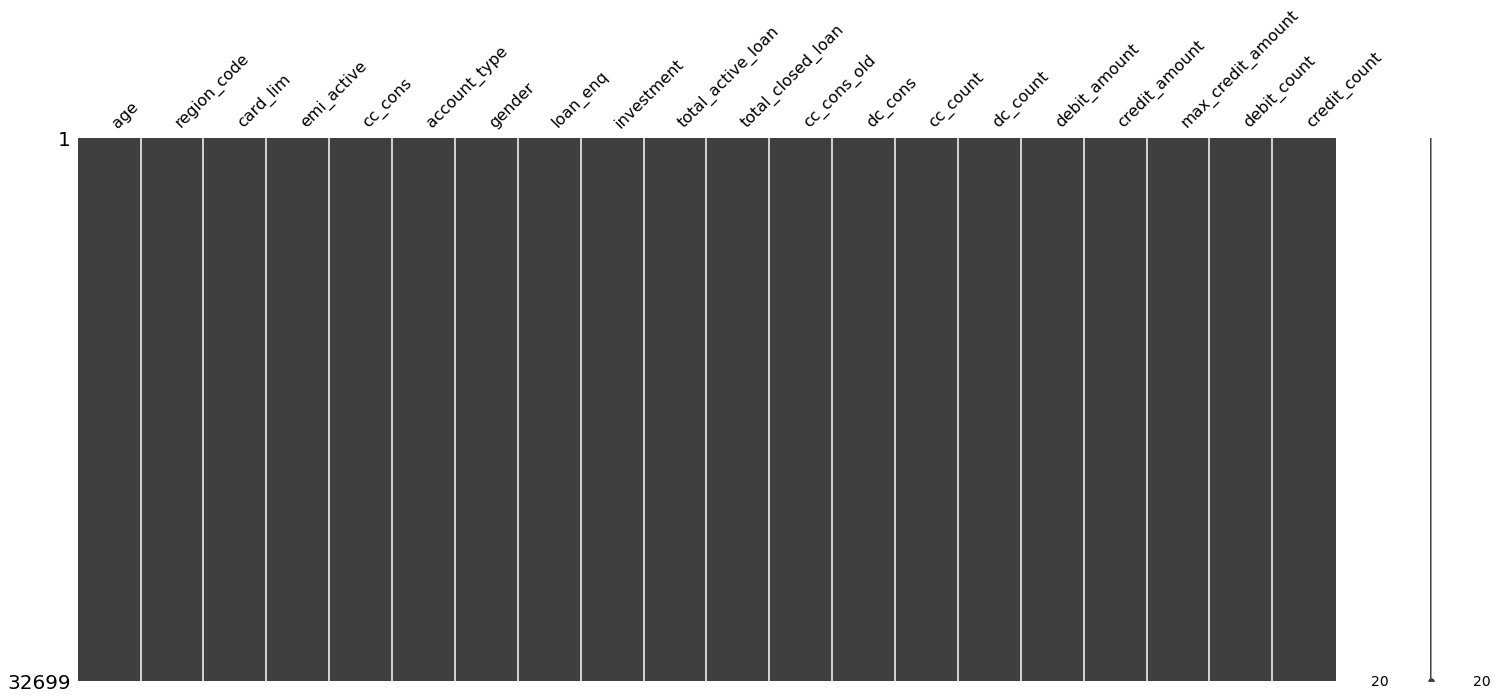

In [60]:
# Visualize missing data using missingno in train dataset.
msno.matrix(train)

<AxesSubplot:>

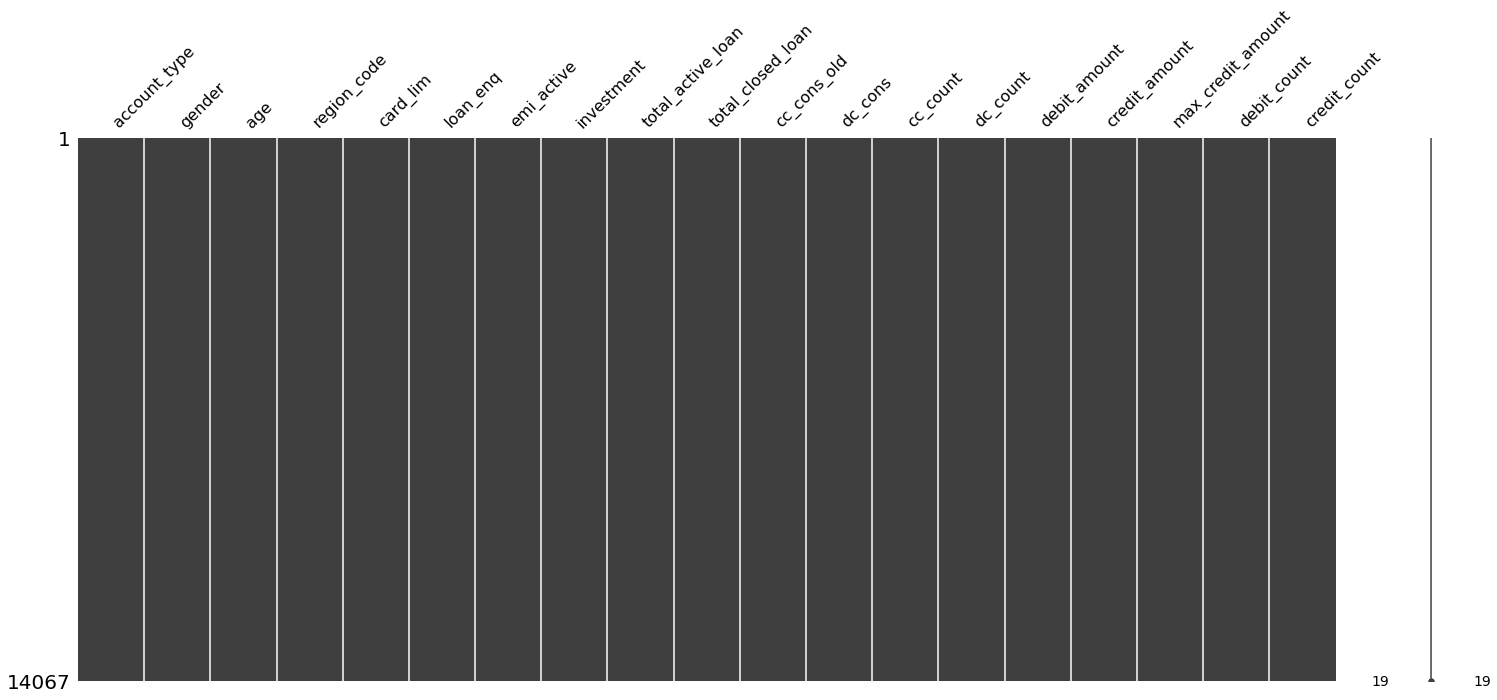

In [61]:
# Visualize missing data using missingno in test dataset.
msno.matrix(test)

# Encoding Categorical Variables

In [62]:
train.describe(include=object)

,account_type,gender
count,32699,32699
unique,2,2
top,current,M
freq,25750,28004


In [63]:
test.describe(include=object)

,account_type,gender
count,14067,14067
unique,2,2
top,current,M
freq,11102,12044


In [64]:
#list of categorical columns
cat_cols1 = train.select_dtypes(include=[object]).columns.to_list()
cat_cols1

['account_type', 'gender']

In [65]:
# Perform one-hot encoding on categorical columns
train = pd.get_dummies(train, prefix=['account_type', 'gender'], drop_first=True)

test = pd.get_dummies(test, prefix=['account_type', 'gender'], drop_first=True)

In [66]:
train.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
age,32699.0,35.837824,7.568613,22.000000,31.000000,34.000000,39.000000,7.100000e+01
region_code,32699.0,554.893758,188.215980,123.000000,425.000000,575.000000,683.000000,9.770000e+02
card_lim,32699.0,120734.153338,121914.190780,0.000000,45000.000000,75000.000000,144000.000000,1.000000e+06
emi_active,32699.0,8021.429832,85678.900949,0.000000,0.000000,145.580000,4162.195000,7.447125e+06
cc_cons,32699.0,6425.450564,9719.187847,0.000000,1281.000000,3127.000000,7286.000000,9.974000e+04
loan_enq,32699.0,0.018563,0.134979,0.000000,0.000000,0.000000,0.000000,1.000000e+00
investment,32699.0,49303.846709,946598.374261,0.000000,0.000000,0.000000,0.000000,8.445222e+07
total_active_loan,32699.0,0.109116,0.321639,0.000000,0.000000,0.000000,0.000000,2.000000e+00
total_closed_loan,32699.0,0.136854,0.372891,0.000000,0.000000,0.000000,0.000000,2.000000e+00
cc_cons_old,32699.0,13167.243602,15699.679749,254.333333,4232.616667,8501.166667,16185.601667,4.558843e+05


In [67]:
test.select_dtypes(exclude='object').T

,0,1,2,3,4,5,6,7,8,9,...,14057,14058,14059,14060,14061,14062,14063,14064,14065,14066
age,36.000000,31.000000,26.000000,39.000000,44.000000,32.000000,39.000000,39.000000,44.000000,26.000000,...,32.000000,33.000000,31.000000,25.000000,33.000000,39.000000,57.000000,36.000000,33.000000,31.000000
region_code,447.000000,233.000000,823.000000,878.000000,404.000000,523.000000,233.000000,233.000000,764.000000,683.000000,...,623.000000,683.000000,534.000000,534.000000,233.000000,233.000000,523.000000,805.000000,683.000000,523.000000
card_lim,75000.000000,116000.000000,40000.000000,86000.000000,250000.000000,132000.000000,84000.000000,98000.000000,574000.000000,45000.000000,...,40000.000000,40000.000000,50000.000000,33000.000000,66000.000000,100000.000000,300000.000000,50000.000000,50000.000000,120000.000000
loan_enq,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
emi_active,0.000000,0.000000,2885.820000,0.000000,3342.580000,1941.890000,3879.770000,96113.870000,2256.820000,0.000000,...,8650.000000,0.000000,0.000000,0.000000,20892.910000,5810.980000,0.000000,5506.560000,525.420000,235.670000
investment,0.000000,0.000000,0.000000,0.000000,0.000000,100000.000000,0.000000,5000.000000,115012.950000,10000.000000,...,0.000000,0.000000,553.000000,0.000000,0.000000,159061.000000,60059.000000,0.000000,0.000000,6885.000000
total_active_loan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
total_closed_loan,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
cc_cons_old,8049.900000,34978.856667,3984.763333,12382.900000,23048.493333,8707.630000,5373.873333,5118.000000,5842.970000,2144.335000,...,13328.610000,1460.000000,15962.808333,4393.901667,26945.303333,25165.913333,23095.333333,66898.051667,14426.180000,2230.603333
dc_cons,1170.000000,0.000000,1158.000000,0.000000,0.000000,0.000000,0.000000,1242.000000,0.000000,2091.833333,...,1457.000000,6798.333333,1441.500000,1516.666667,462.000000,6890.290000,0.000000,1918.000000,1745.333333,3306.176667


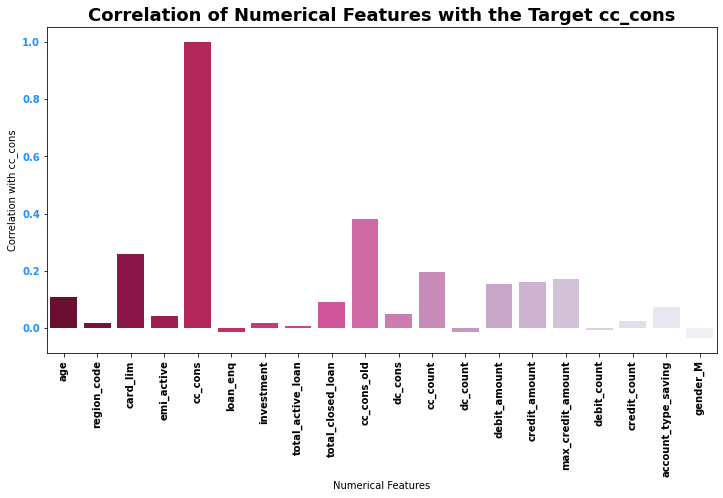

In [68]:
# Select numerical columns (excluding object data types)
num = train.select_dtypes(exclude='object')

# Calculate the correlation matrix
corr_num = train.corr()

# Create a bar plot to visualize the correlation of numerical features with the target variable
plt.figure(figsize=(12, 6))
sns.barplot(x=corr_num['cc_cons'].index, y=corr_num['cc_cons'].values, palette='PuRd_r')
plt.xlabel('Numerical Features')
plt.ylabel('Correlation with cc_cons')
plt.title('Correlation of Numerical Features with the Target cc_cons', weight='bold', fontsize=18)
plt.xticks(rotation=90, weight='bold')
plt.yticks(weight='bold', color='dodgerblue')
plt.show()


In [69]:
corr_num

,age,region_code,card_lim,emi_active,cc_cons,loan_enq,investment,total_active_loan,total_closed_loan,cc_cons_old,dc_cons,cc_count,dc_count,debit_amount,credit_amount,max_credit_amount,debit_count,credit_count,account_type_saving,gender_M
age,1.000000,-0.036095,0.393876,0.063074,0.107883,-0.015045,0.031198,0.040511,0.246913,0.146099,-0.051583,0.025598,-0.205539,0.088764,0.096731,0.123914,-0.197865,-0.127577,0.233471,0.087823
region_code,-0.036095,1.000000,-0.025935,0.002556,0.017446,0.009597,-0.002864,0.034038,-0.007191,-0.006036,0.008878,0.020293,0.043129,0.012683,0.003380,0.004788,0.093900,0.045314,-0.041982,-0.016201
card_lim,0.393876,-0.025935,1.000000,0.078992,0.259402,-0.027930,0.037296,-0.004704,0.181483,0.365599,-0.022370,0.189818,-0.129116,0.232002,0.236464,0.260962,-0.070591,-0.004203,0.110275,0.044706
emi_active,0.063074,0.002556,0.078992,1.000000,0.040905,-0.002613,0.008655,0.019596,0.064208,0.084651,-0.006142,0.022281,-0.022923,0.100248,0.089013,0.115693,-0.017400,-0.009093,0.026908,0.008806
cc_cons,0.107883,0.017446,0.259402,0.040905,1.000000,-0.011856,0.017137,0.009211,0.093238,0.380711,0.048593,0.198012,-0.015043,0.156051,0.162602,0.172314,-0.007472,0.024313,0.073474,-0.035925
loan_enq,-0.015045,0.009597,-0.027930,-0.002613,-0.011856,1.000000,-0.006034,0.101275,0.043098,0.001675,0.016071,0.002619,0.015141,0.034324,0.035690,0.036509,0.053100,0.046541,-0.009967,0.011730
investment,0.031198,-0.002864,0.037296,0.008655,0.017137,-0.006034,1.000000,-0.002479,0.007288,0.024642,0.016870,0.007143,-0.007235,0.051075,0.049217,0.046666,0.008285,0.027808,0.026399,0.001764
total_active_loan,0.040511,0.034038,-0.004704,0.019596,0.009211,0.101275,-0.002479,1.000000,0.201369,0.023179,-0.010478,0.005726,-0.031848,0.029277,0.024835,0.011594,0.000168,0.015629,0.041081,0.041839
total_closed_loan,0.246913,-0.007191,0.181483,0.064208,0.093238,0.043098,0.007288,0.201369,1.000000,0.114178,-0.013522,0.066365,-0.071700,0.093275,0.093215,0.102172,-0.050638,-0.020656,0.108461,0.053917
cc_cons_old,0.146099,-0.006036,0.365599,0.084651,0.380711,0.001675,0.024642,0.023179,0.114178,1.000000,0.068752,0.418520,-0.057666,0.249564,0.247253,0.228759,-0.011754,0.101334,0.095165,0.002677


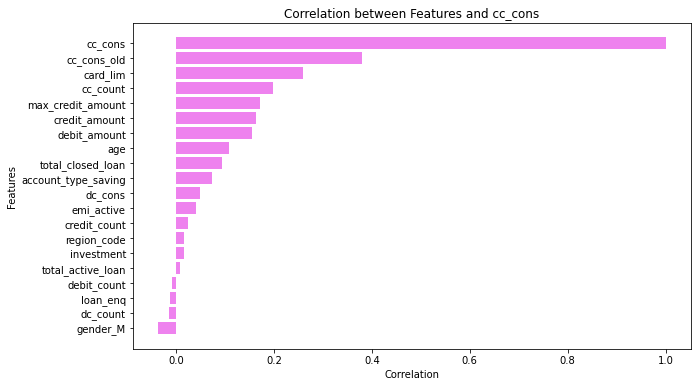

In [70]:
# Calculate the correlation between all features and the target variable 'cc_cons'
correlation = train.corr()['cc_cons'].sort_values(ascending=False)

# Create a bar chart to visualize correlations
plt.figure(figsize=(10, 6))
plt.barh(correlation.index, correlation.values, color='violet')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Correlation between Features and cc_cons')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


In [71]:
#Splitting the Dataset for predictive modelling

y = train.loc[:,'cc_cons']
x = train.drop(columns='cc_cons')

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (32699, 19)
Shape of y: (32699,)


In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)


print("The Shape Of x train:", x_train.shape)
print("The Shape Of x test:", x_test.shape)
print("The Shape Of y train:", y_train.shape)
print("The Shape Of y val:", y_test.shape)


The Shape Of x train: (24524, 19)
The Shape Of x test: (8175, 19)
The Shape Of y train: (24524,)
The Shape Of y val: (8175,)


In [73]:
# Import regression models.
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, 
                        SGDRegressor, BayesianRidge, HuberRegressor)
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
              BaggingRegressor, AdaBoostRegressor)
from sklearn.svm import SVR, LinearSVR, NuSVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [74]:
# Define your models and model_names
models = [
    RandomForestRegressor(),
    AdaBoostRegressor(),
    BaggingRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    KNeighborsRegressor(),
    Lasso(),
    Ridge(),
    LinearRegression(),
    BayesianRidge(),
    DecisionTreeRegressor(),
     HuberRegressor(),
    ]

model_names = [
    'RandomForestRegressor',
    'AdaBoostRegressor',
    'BaggingRegressor',
    'GradientBoostingRegressor',
    'SVR',
    'KNeighborsRegressor',
    'Lasso',
    'Ridge',
    'LinearRegression',
    'BayesianRidge',
    'DecisionTreeRegressor',
    'HuberRegressor']

In [75]:
import time
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_log_error
from sklearn.metrics import accuracy_score


def train_and_evaluate(model, model_name):
    # Start timing the training process
    start_time = time.time()
    

    # Train the model on the training data
    model.fit(x_train, y_train)

    # Make predictions on the test data
    test_pred = model.predict(x_test)

    # Calculate Mean Squared Error (MSE)
    mse = np.square(np.subtract(y_test,test_pred)).mean()

    # Calculate R-squared
    r2 = r2_score(y_test, test_pred)
    



    # Calculate Explained Variance Score (EVS)
    evs = explained_variance_score(y_test, test_pred)

    # Calculate Root Mean Squared Logarithmic Error (RMSLE)
    rmsle = np.sqrt(np.mean(np.square(np.log1p(test_pred) - np.log1p(y_test))))


    # Calculate the time taken for training and evaluation
    end_time = time.time()
    training_time = end_time - start_time

    return {
        'Model Name': model_name,
        'Mean Squared Error': mse,
        'R-squared': r2,
        'Explained Variance Score': evs,
        'RMSLE': rmsle,
        'Training Time (seconds)': training_time
        
    }



In [76]:
results = []

for model, model_name in zip(models, model_names):
    print("-------------------")
    print("Starting Model =", model_name)
    result = train_and_evaluate(model, model_name)
    results.append(result)

-------------------
Starting Model = RandomForestRegressor
-------------------
Starting Model = AdaBoostRegressor
-------------------
Starting Model = BaggingRegressor
-------------------
Starting Model = GradientBoostingRegressor
-------------------
Starting Model = SVR
-------------------
Starting Model = KNeighborsRegressor
-------------------
Starting Model = Lasso
-------------------
Starting Model = Ridge
-------------------
Starting Model = LinearRegression
-------------------
Starting Model = BayesianRidge
-------------------
Starting Model = DecisionTreeRegressor
-------------------
Starting Model = HuberRegressor


C:\Users\bipin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\bipin\AppData\Local\Temp\ipykernel_4120\1412282578.py:30: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.square(np.log1p(test_pred) - np.log1p(y_test))))


In [77]:
res_df = pd.DataFrame(results)
res_df

,Model Name,Mean Squared Error,R-squared,Explained Variance Score,RMSLE,Training Time (seconds)
0,RandomForestRegressor,7.705918e+07,0.146815,0.152101,1.402326,24.929577
1,AdaBoostRegressor,1.340036e+08,-0.483662,-0.163603,1.728064,0.794332
2,BaggingRegressor,8.503556e+07,0.058502,0.062772,1.411842,2.644266
3,GradientBoostingRegressor,7.336480e+07,0.187719,0.187868,1.364607,6.362265
4,SVR,1.001609e+08,-0.108962,0.007948,1.309152,48.135726
5,KNeighborsRegressor,9.225951e+07,-0.021480,-0.020940,1.416020,0.366643
6,Lasso,7.378946e+07,0.183017,0.183167,1.371378,1.446000
7,Ridge,7.379330e+07,0.182975,0.183124,1.371412,0.046939
8,LinearRegression,7.379344e+07,0.182973,0.183123,1.371413,0.063060
9,BayesianRidge,7.384246e+07,0.182430,0.182551,1.383520,0.047274


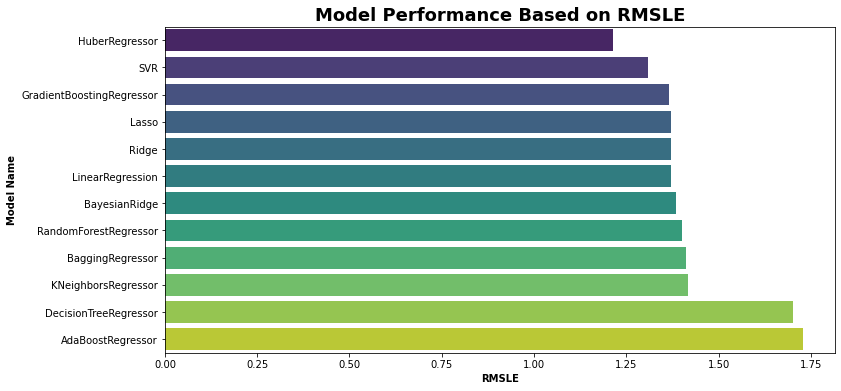

In [78]:
# Sort the DataFrame by RMSLE in ascending order
df_sorted = res_df.sort_values(by='RMSLE')

# Create a bar plot to visualize model performance
plt.figure(figsize=(12, 6))
sns.barplot(x='RMSLE', y='Model Name', data=df_sorted, palette='viridis')
plt.title('Model Performance Based on RMSLE', weight='bold', fontsize=18)
plt.xlabel('RMSLE', weight='bold')
plt.ylabel('Model Name', weight='bold')
plt.show()

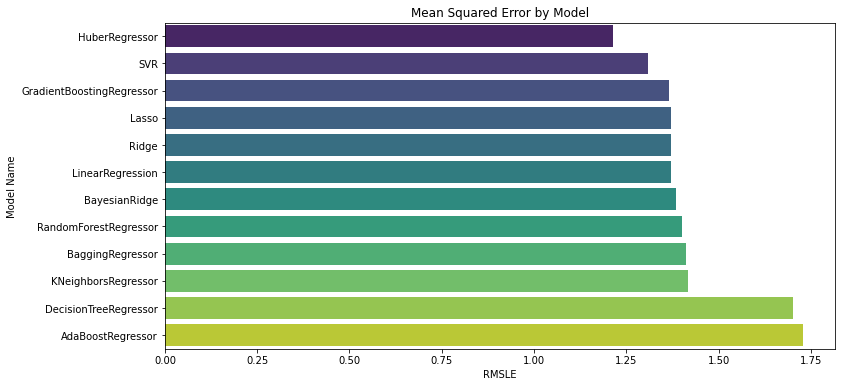

In [79]:
# Sort the DataFrame by MSE in ascending order
df_sorted = res_df.sort_values(by='RMSLE')

plt.figure(figsize=(12, 6))
sns.barplot(x='RMSLE', y='Model Name', data=df_sorted, palette='viridis')
plt.title('Mean Squared Error by Model')
plt.xlabel('RMSLE')
plt.ylabel('Model Name')
plt.show()


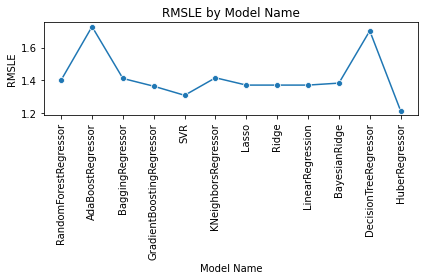

In [80]:
# Create a scatter plot with points joined by a single line
sns.lineplot(x='Model Name', y='RMSLE', data=res_df, marker='o')
plt.title('RMSLE by Model Name')
plt.xlabel('Model Name')
plt.ylabel('RMSLE')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensures that labels are not cut off
plt.show()

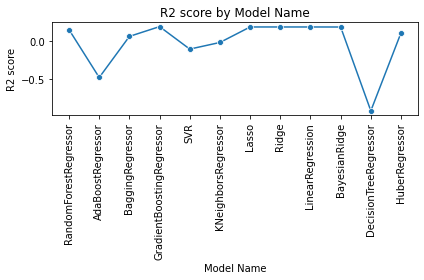

In [81]:
# Create a scatter plot with points joined by a single line
sns.lineplot(x='Model Name', y='R-squared', data=res_df, marker='o')
plt.title('R2 score by Model Name')
plt.xlabel('Model Name')
plt.ylabel('R2 score')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensures that labels are not cut off
plt.show()

# Submission

In [82]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error



# Create a HuberRegressor model
huber_model = HuberRegressor(epsilon=1.35,alpha=1.2,max_iter=100)  # You can adjust the 'epsilon' hyperparameter

#Ensure that the columns order in df_test matches X_train
test_reordered = test[x_train.columns]

# Fit the model to the training data
huber_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = huber_model.predict(test_reordered)

C:\Users\bipin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [83]:
submission = pd.DataFrame({
        "id": test_id,
        "cc_cons":y_pred
    })

In [84]:
submission.to_csv('submission_huber_final.csv', index=False)